# Setup

In [1]:
import matplotlib.pyplot as plt
import zfit
from zfit import z  # math backend of zfit
import numpy as np
import pandas as pd
import tensorflow as tf

/home/carlos/anaconda3/envs/zfit_latest/lib/python3.8/site-packages/zfit/__init__.py:50: UserWarning: This is an ALPHA version of zfit for feature testing, do NOT use it in production! It is NOT stable and contains bugs and untested features. For production use, please use the last beta stable version of zfit.
  warnings.warn(
/home/carlos/anaconda3/envs/zfit_latest/lib/python3.8/site-packages/zfit/__init__.py:62: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [2]:
from math import ceil

In [3]:
from scipy import stats

In [4]:
#KS test from scypy to get p-values

from scipy.stats import cramervonmises, kstest, cramervonmises_2samp

In [5]:
# Following https://stackoverflow.com/a/64604031
import sys

from pathlib import Path

In [6]:
# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[2]/"scripts")

if module_path not in sys.path:
    sys.path.append(module_path)
    
data_path = str(Path.cwd().parents[2] / "data" / "EfficiencyData" )

In [7]:
# Modules made by Horacio

import zfitEffy
import customPDFs
import plot_tools

# Importing data

In [8]:
cos_np = np.linspace(-1, 1, 1000)

In [9]:
cos = zfit.Space('cosThetaKMu', [-1,1])

In [10]:
binned_dataframes = [
    # {
    #     'bin': -1,
    #     'dataframe': pd.read_csv(data_path + "/PHSP_Corrected_-1.csv")
    # },
    # {
    #     'bin': 0,
    #     'dataframe': pd.read_csv(data_path + "/PHSP_Corrected_0.csv")
    # },
    # {
    #     'bin': 1,
    #     'dataframe': pd.read_csv(data_path + "/PHSP_Corrected_1.csv")
    # },
    # {
    #     'bin': 2,
    #     'dataframe': pd.read_csv(data_path + "/PHSP_Corrected_2.csv")
    # },
    {
        'bin': 4,
        'dataframe': pd.read_csv(data_path + "/PHSP_Corrected_4.csv")
    },
    # {
    #     'bin': 6,
    #     'dataframe': pd.read_csv(data_path + "/PHSP_Corrected_6.csv")
    # },
    # {
    #     'bin': 7,
    #     'dataframe': pd.read_csv(data_path + "/PHSP_Corrected_7.csv")
    # },
    # {
    #     'bin': 8,
    #     'dataframe': pd.read_csv(data_path + "/PHSP_Corrected_8.csv")
    # },
    # {
    #     'bin': 9,
    #     'dataframe': pd.read_csv(data_path + "/PHSP_Corrected_9.csv")
    # },
    # {
    #     'bin': 10,
    #     'dataframe': pd.read_csv(data_path + "/PHSP_Corrected_10.csv")
    # },
    # {
    #     'bin': 'Complete',
    #     'dataframe': pd.read_csv(data_path + "/PHSP_Corrected_Complete.csv")
    # },
]

In [11]:
zfit_w_data = []
# bin_names = [-1,-0,1,2,4,6,7,8,9,10,'Complete']
bin_names = [4]
i=0

for item in binned_dataframes:
    zfit_w_data.append({
        'bin': bin_names[i],
        'data': zfit.Data.from_pandas(pd.DataFrame(item['dataframe'].cosThetaKMu), cos, weights=item['dataframe'].totalW)
    })
    i = i+1

# Models

In [12]:
max_degree = 14

In [13]:
models, parameters  = zfitEffy.create_bernstein_models(obs=cos, max_degree=max_degree,retParams=True)

In [14]:
models

{0: <zfit.<class 'customPDFs.bernstein'>  params=[c^0_0],
 1: <zfit.<class 'customPDFs.bernstein'>  params=[c^0_1, c^1_1],
 2: <zfit.<class 'customPDFs.bernstein'>  params=[c^0_2, c^1_2, c^2_2],
 3: <zfit.<class 'customPDFs.bernstein'>  params=[c^0_3, c^1_3, c^2_3, c^3_3],
 4: <zfit.<class 'customPDFs.bernstein'>  params=[c^0_4, c^1_4, c^2_4, c^3_4, c^4_4],
 5: <zfit.<class 'customPDFs.bernstein'>  params=[c^0_5, c^1_5, c^2_5, c^3_5, c^4_5, c^5_5],
 6: <zfit.<class 'customPDFs.bernstein'>  params=[c^0_6, c^1_6, c^2_6, c^3_6, c^4_6, c^5_6, c^6_6],
 7: <zfit.<class 'customPDFs.bernstein'>  params=[c^0_7, c^1_7, c^2_7, c^3_7, c^4_7, c^5_7, c^6_7, c^7_7],
 8: <zfit.<class 'customPDFs.bernstein'>  params=[c^0_8, c^1_8, c^2_8, c^3_8, c^4_8, c^5_8, c^6_8, c^7_8, c^8_8],
 9: <zfit.<class 'customPDFs.bernstein'>  params=[c^0_9, c^1_9, c^2_9, c^3_9, c^4_9, c^5_9, c^6_9, c^7_9, c^8_9, c^9_9],
 10: <zfit.<class 'customPDFs.bernstein'>  params=[c^0_10, c^10_10, c^1_10, c^2_10, c^3_10, c^4_10, c^5_1

In [15]:
parameters

[[<zfit.Parameter 'c^0_0' floating=True value=0.1>],
 [<zfit.Parameter 'c^0_1' floating=True value=0.1>,
  <zfit.Parameter 'c^1_1' floating=True value=0.1>],
 [<zfit.Parameter 'c^0_2' floating=True value=0.1>,
  <zfit.Parameter 'c^1_2' floating=True value=0.1>,
  <zfit.Parameter 'c^2_2' floating=True value=0.1>],
 [<zfit.Parameter 'c^0_3' floating=True value=0.1>,
  <zfit.Parameter 'c^1_3' floating=True value=0.1>,
  <zfit.Parameter 'c^2_3' floating=True value=0.1>,
  <zfit.Parameter 'c^3_3' floating=True value=0.1>],
 [<zfit.Parameter 'c^0_4' floating=True value=0.1>,
  <zfit.Parameter 'c^1_4' floating=True value=0.1>,
  <zfit.Parameter 'c^2_4' floating=True value=0.1>,
  <zfit.Parameter 'c^3_4' floating=True value=0.1>,
  <zfit.Parameter 'c^4_4' floating=True value=0.1>],
 [<zfit.Parameter 'c^0_5' floating=True value=0.1>,
  <zfit.Parameter 'c^1_5' floating=True value=0.1>,
  <zfit.Parameter 'c^2_5' floating=True value=0.1>,
  <zfit.Parameter 'c^3_5' floating=True value=0.1>,
  <zfit

# Minimization

In [16]:
testing_bin = bin_names.index(4)

In [17]:
testing_bin

0

In [18]:
minimizer = zfit.minimize.Minuit()

In [19]:
# First get the minimization of all models in the same bin, then generalize to multiple bins
#Working just with 4th bin for now

i=0
nll_bin = []
minimums = []
results = []
while i < max_degree:
    nll_bin.append(zfit.loss.UnbinnedNLL(model=models[i], data=zfit_w_data[testing_bin]['data']))
    minimums.append(minimizer.minimize(loss=nll_bin[i]))
    results.append(minimums[i].hesse())
    i=i+1

/home/carlos/anaconda3/envs/zfit_latest/lib/python3.8/site-packages/zfit/minimizers/fitresult.py:1170: ChangedFeatureWarning: The behavior of this functionality recently changed.To turn this warning off, use `zfit.settings.changed_warnings.hesse_name = False`  or 'all' with `zfit.settings.changed_warnings.all = False
Default name of hesse (which is currently the method name such as `minuit_hesse`or `hesse_np`) has changed to `hesse` (it still adds the old one as well. This will be removed in the future). INSTRUCTIONS: to stay compatible,  change wherever you access the error to 'hesse' (if you don't explicitly specify the name in hesse(...).
  warn_changed_feature(message, "hesse_name")


# Comparison between all the models

In [20]:
data_samples = []

n_samples = 1000

j=0

# Cambio de la cantidad de muestras a la suma de los pesos

for j in range(n_samples):
    samples_models = []
    i=0
    for model in models:
        samples_models.append(models[i].create_sampler(n = ceil(binned_dataframes[testing_bin]['dataframe'].totalW.sum()), fixed_params=True))
        i=i+1
    data_samples.append(samples_models)

## KS Test

In [21]:
class test_result:
    def __init__(self, statistic, pvalue, degree):
        self.statistic = statistic
        self.pvalue = pvalue
        self.degree = degree

In [22]:
from ks_test import ks_2samp_weighted

In [23]:
data_samples[0]

In [24]:
ks_list = []
statistic_list = []

j=0

for samples_models in data_samples:
    ks_results = []
    best_ks_result = test_result(1,0,-1)
    best_index_ks = 0

    i=0
    for sample in samples_models:
        ks_results.append({'kstest': ks_2samp_weighted( binned_dataframes[testing_bin]['dataframe'].cosThetaKMu.to_numpy(),
                                      data_samples[j][i].to_pandas().to_numpy().flatten(),
                                      binned_dataframes[testing_bin]['dataframe'].totalW
                                    ),
                           'deg': i})
        i=i+1
    ks_list.append(ks_results)
    j=j+1

In [25]:
ks_list[0][2]['kstest'][1] #[1]: pvalue; [0]: statistic

0.3096662460907223

In [26]:
import os

In [27]:
results_path = my_path = os.path.abspath('') + '/results/'

In [28]:
results_path

'/home/carlos/projects/Ayudantia/projects/results/'

In [29]:
# pval_deg = 0
# val_name = ["statictic", "p-value"][0] # "p-value"
# for i in range(max_degree):
#     pval_arr = []
#     for item in ks_list:
#         pval_arr.append(item[0][pval_deg]['kstest'][0]) #[1]: pvalue; [0]: statistic
#     plt.hist(pval_arr, bins=20)
#     plt.title(val_name + ' distribution for Bernstein deg ' + str(pval_deg))
#     plt.xlabel(val_name)
#     plt.ylabel('Frequency')

#     plt.savefig(results_path+val_name+'_dist_deg'+str(pval_deg)+'.png')
    
#     pval_deg = pval_deg+1
    
#     plt.show()

In [30]:
# A function that helps me get an array for x and y values of the p-value distribution

def pvalfit(pval_arr, bins=20):
    y_values = np.histogram(pval_arr)
    x_values = pval_arr
    
    

In [31]:
pval_arr = []
for item in ks_list:
        pval_arr.append(item[0]['kstest'][1]) 
hist_values = np.histogram(pval_arr, bins=20)
hist_values

(array([395, 154, 108,  75,  51,  46,  30,  21,  17,  19,  16,  16,   7,
          9,   8,  11,   5,   3,   4,   5]),
 array([4.04375976e-05, 4.58850080e-02, 9.17295785e-02, 1.37574149e-01,
        1.83418719e-01, 2.29263290e-01, 2.75107860e-01, 3.20952431e-01,
        3.66797001e-01, 4.12641572e-01, 4.58486142e-01, 5.04330712e-01,
        5.50175283e-01, 5.96019853e-01, 6.41864424e-01, 6.87708994e-01,
        7.33553565e-01, 7.79398135e-01, 8.25242706e-01, 8.71087276e-01,
        9.16931846e-01]))

In [32]:
# for item in ks_list:
#     pval_arr.append(item[pval_deg]['kstest'][1]) 
# y_values = np.histogram(ks_list[0][0]['kstest'][1], bins=20)

[0.022962722818519177, 0.06880729326034188, 0.11465186370216457, 0.1604964341439873, 0.20634100458580995, 0.25218557502763267, 0.2980301454694554, 0.34387471591127805, 0.3897192863531008, 0.4355638567949235, 0.48140842723674615, 0.5272529976785689, 0.5730975681203916, 0.6189421385622143, 0.6647867090040369, 0.7106312794458597, 0.7564758498876824, 0.8023204203295051, 0.8481649907713278, 0.8940095612131504]


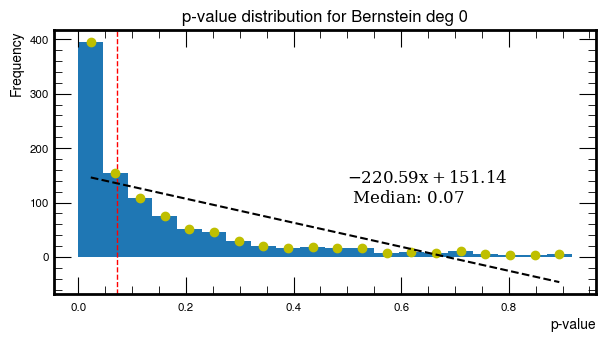

[0.03608322504157091, 0.08502612953018873, 0.13396903401880655, 0.18291193850742438, 0.2318548429960422, 0.28079774748466, 0.32974065197327784, 0.37868355646189567, 0.4276264609505135, 0.4765693654391313, 0.5255122699277491, 0.574455174416367, 0.6233980789049848, 0.6723409833936026, 0.7212838878822204, 0.7702267923708382, 0.8191696968594561, 0.8681126013480739, 0.9170555058366917, 0.9659984103253095]


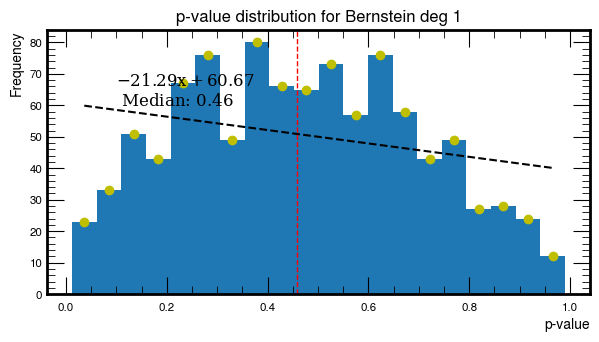

[0.03145174740383834, 0.0809948728897609, 0.13053799837568347, 0.18008112386160602, 0.22962424934752862, 0.27916737483345117, 0.32871050031937377, 0.3782536258052963, 0.42779675129121886, 0.4773398767771414, 0.526883002263064, 0.5764261277489866, 0.625969253234909, 0.6755123787208317, 0.7250555042067544, 0.7745986296926768, 0.8241417551785994, 0.8736848806645219, 0.9232280061504445, 0.9727711316363672]


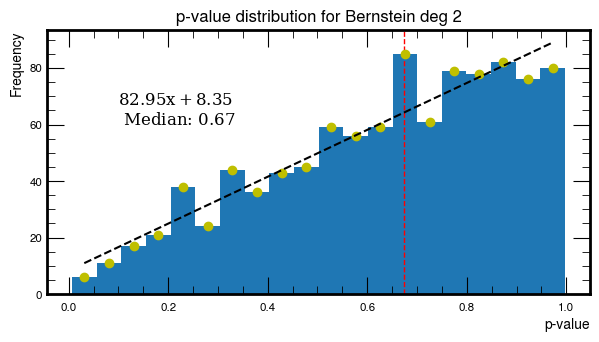

[0.06454205187681038, 0.11249135349383646, 0.16044065511086256, 0.20838995672788865, 0.2563392583449148, 0.3042885599619408, 0.35223786157896697, 0.400187163195993, 0.44813646481301916, 0.49608576643004526, 0.5440350680470714, 0.5919843696640975, 0.6399336712811236, 0.6878829728981497, 0.7358322745151757, 0.7837815761322019, 0.8317308777492279, 0.8796801793662541, 0.9276294809832801, 0.9755787826003063]


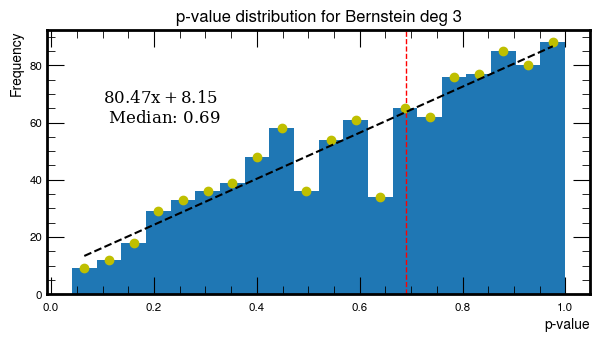

[0.041506768700450926, 0.09052527947023861, 0.13954379024002628, 0.18856230100981397, 0.23758081177960166, 0.28659932254938936, 0.335617833319177, 0.3846363440889647, 0.4336548548587524, 0.4826733656285401, 0.5316918763983278, 0.5807103871681154, 0.629728897937903, 0.6787474087076908, 0.7277659194774784, 0.7767844302472662, 0.8258029410170538, 0.8748214517868416, 0.9238399625566291, 0.972858473326417]


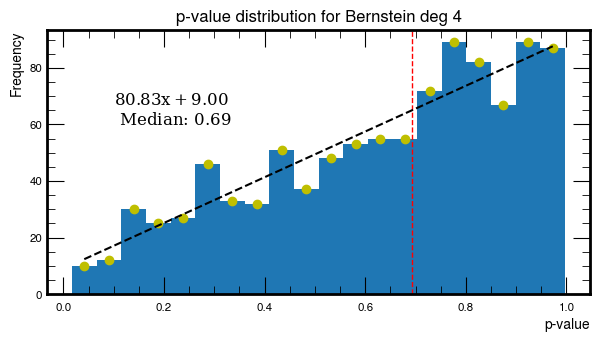

[0.030696237337847623, 0.08034608448241773, 0.12999593162698786, 0.17964577877155796, 0.22929562591612807, 0.27894547306069817, 0.32859532020526827, 0.3782451673498384, 0.4278950144944085, 0.4775448616389786, 0.5271947087835487, 0.5768445559281189, 0.626494403072689, 0.6761442502172591, 0.7257940973618292, 0.7754439445063993, 0.8250937916509694, 0.8747436387955395, 0.9243934859401096, 0.9740433330846797]


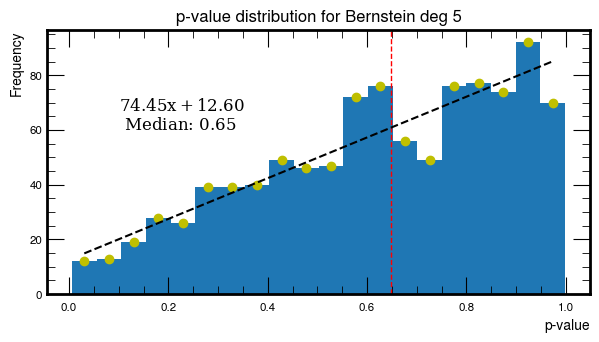

[0.046783006820781625, 0.09563035811426884, 0.1444777094077561, 0.1933250607012433, 0.24217241199473052, 0.29101976328821777, 0.33986711458170493, 0.3887144658751922, 0.43756181716867937, 0.48640916846216664, 0.5352565197556538, 0.5841038710491411, 0.6329512223426284, 0.6817985736361155, 0.7306459249296027, 0.77949327622309, 0.8283406275165772, 0.8771879788100645, 0.9260353301035517, 0.9748826813970388]


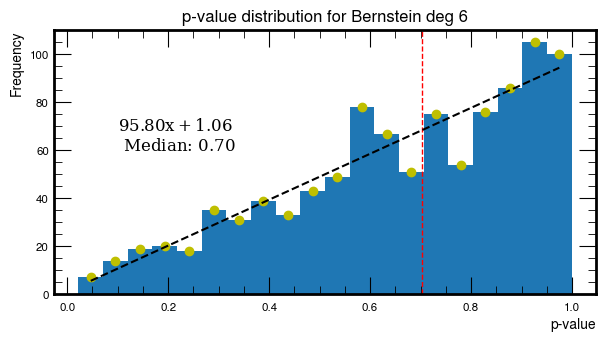

[0.029762530256648698, 0.07950541523861528, 0.12924830022058187, 0.17899118520254842, 0.22873407018451503, 0.2784769551664816, 0.3282198401484482, 0.37796272513041473, 0.4277056101123813, 0.4774484950943479, 0.5271913800763145, 0.576934265058281, 0.6266771500402476, 0.6764200350222143, 0.7261629200041808, 0.7759058049861474, 0.8256486899681139, 0.8753915749500805, 0.925134459932047, 0.9748773449140137]


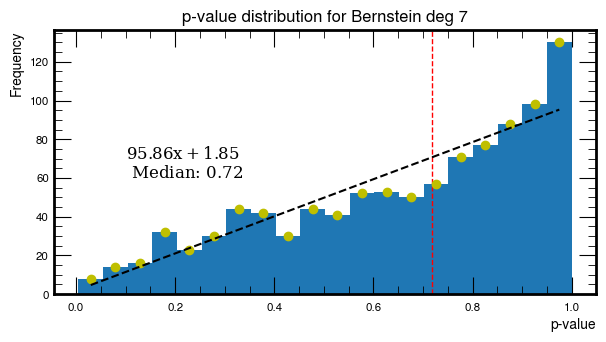

[0.0502277153206421, 0.09892755044373552, 0.14762738556682897, 0.19632722068992237, 0.24502705581301581, 0.29372689093610926, 0.34242672605920266, 0.39112656118229605, 0.43982639630538956, 0.48852623142848295, 0.5372260665515763, 0.5859259016746698, 0.6346257367977632, 0.6833255719208566, 0.73202540704395, 0.7807252421670435, 0.8294250772901369, 0.8781249124132304, 0.9268247475363238, 0.9755245826594172]


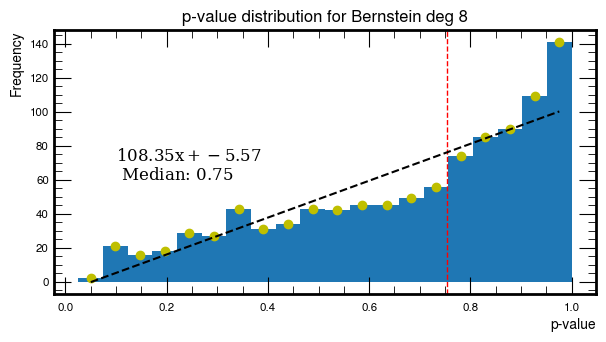

[0.04034660433542839, 0.08955238461579648, 0.13875816489616458, 0.18796394517653267, 0.23716972545690077, 0.2863755057372689, 0.3355812860176369, 0.3847870662980051, 0.4339928465783731, 0.48319862685874126, 0.5324044071391094, 0.5816101874194775, 0.6308159676998455, 0.6800217479802135, 0.7292275282605818, 0.7784333085409498, 0.8276390888213179, 0.8768448691016859, 0.9260506493820542, 0.9752564296624222]


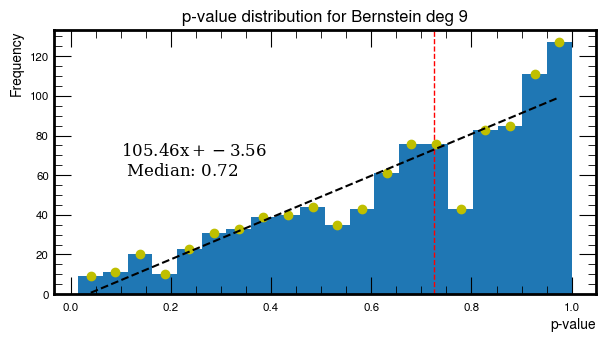

[0.03514998250090381, 0.08461051405810793, 0.13407104561531208, 0.1835315771725162, 0.23299210872972034, 0.28245264028692446, 0.3319131718441286, 0.3813737034013327, 0.4308342349585369, 0.48029476651574105, 0.5297552980729452, 0.5792158296301493, 0.6286763611873534, 0.6781368927445576, 0.7275974243017618, 0.7770579558589659, 0.82651848741617, 0.875979018973374, 0.9254395505305782, 0.9749000820877824]


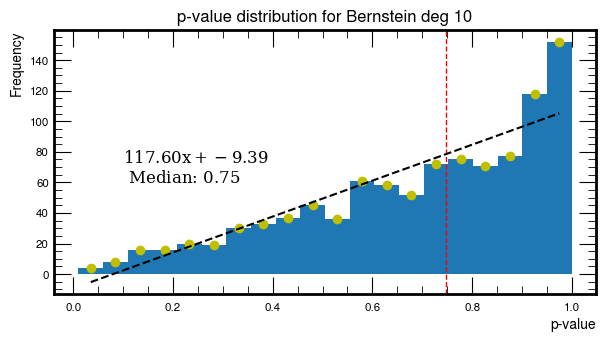

[0.04541784476134121, 0.09436819855684805, 0.1433185523523549, 0.19226890614786174, 0.24121925994336857, 0.2901696137388754, 0.3391199675343823, 0.3880703213298891, 0.43702067512539594, 0.48597102892090277, 0.5349213827164097, 0.5838717365119165, 0.6328220903074233, 0.6817724441029303, 0.730722797898437, 0.7796731516939439, 0.8286235054894506, 0.8775738592849576, 0.9265242130804643, 0.9754745668759712]


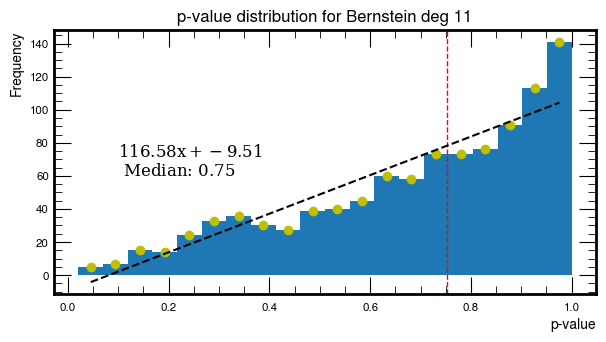

[0.028181324992777545, 0.07801805788512095, 0.12785479077746437, 0.17769152366980778, 0.2275282565621512, 0.2773649894544946, 0.327201722346838, 0.37703845523918145, 0.4268751881315248, 0.4767119210238682, 0.5265486539162116, 0.5763853868085551, 0.6262221197008985, 0.6760588525932418, 0.7258955854855853, 0.7757323183779288, 0.825569051270272, 0.8754057841626155, 0.925242517054959, 0.9750792499473023]


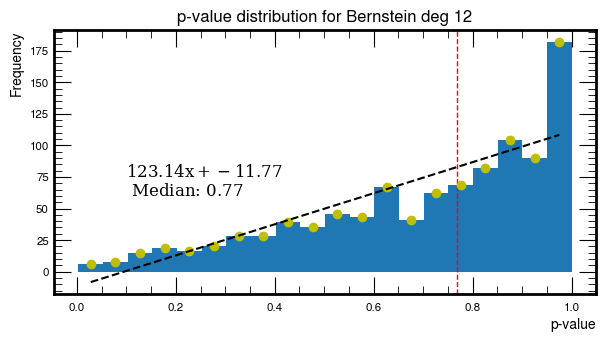

[0.05746244000638562, 0.10579298373088908, 0.15412352745539254, 0.202454071179896, 0.25078461490439946, 0.2991151586289029, 0.34744570235340644, 0.39577624607790984, 0.44410678980241336, 0.49243733352691677, 0.5407678772514202, 0.5890984209759237, 0.6374289647004271, 0.6857595084249306, 0.734090052149434, 0.7824205958739375, 0.8307511395984409, 0.8790816833229445, 0.9274122270474479, 0.9757427707719514]


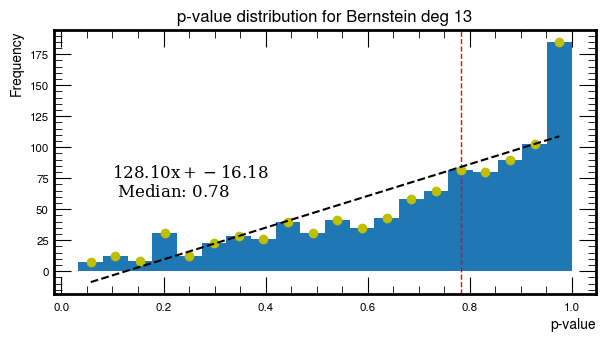

In [56]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

pval_deg = 0
bins = 20
pval_fits = []
pval_hist_list = []
coefs_pval = []
mean_list = []
i=0
val_name = ["statictic", "p-value"][1] # "statistic"

for i in range(max_degree):
    
    fig, axe = plt.subplots(figsize=(7, 3.5), dpi=100)
        
    i_bin = 0
    
    pval_arr = []
    x_values = []
    y_values = []
    for item in ks_list:
        pval_arr.append(item[pval_deg]['kstest'][1]) #[1]: pvalue; [0]: statistic
    pval_hist_list.append(np.histogram(pval_arr, bins=bins))
    y_values = pval_hist_list[pval_deg][0]
    
    for i_bin in range(bins):
        x_values.append((pval_hist_list[pval_deg][1][i_bin] + pval_hist_list[pval_deg][1][i_bin+1]) / 2 )
        
    print(x_values)
    
    coefs_pval.append(np.polyfit(x_values, y_values, 1))
    poly1d_fn = np.poly1d(coefs_pval[i]) 
    # poly1d_fn is now a function which takes in x and returns an estimate for y
    mean_list.append(np.median(pval_arr))
    
    plt.axvline(np.median(pval_arr), color='red', linestyle='dashed', linewidth=1 )
    
    y_pos = 0
    y_pos = 100 if i==0 else 60
    x_pos = 0.5 if i==0 else 0.1
    axe.text(x_pos, y_pos, '$'+ "{:.2f}".format(coefs_pval[i][0]) +  'x+' + 
             "{:.2f}".format(coefs_pval[i][1]) +'$\n Median: $'+"{:.2f}".format(mean_list[i])+'$',
             fontdict=font 
            )
    
    plt.hist(pval_arr, bins=bins)
    plt.title(val_name + ' distribution for Bernstein deg ' + str(pval_deg))
    plt.xlabel(val_name)
    plt.ylabel('Frequency')
        
    plt.plot(x_values, y_values, 'yo', x_values, poly1d_fn(x_values), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker

    plt.savefig(results_path+val_name+'_dist_deg'+str(pval_deg)+'.png')
    
    pval_deg = pval_deg+1
    
    plt.show()

In [34]:
print ("{:<8} {:<20} {:<20}".format('Grado','Slope','Incercept'))
i=0
for coef in coefs_pval:
    print ("{:<8} {:<20} {:<20}".format(i, coef[0],coef[1]))
    i = i+1

Grado    Slope                Incercept           
0        -220.5884329905646   151.13673961516244  
1        -21.292264405767867  60.668293568197925  
2        82.95347529614368    8.348111105857987   
3        80.47346856812621    8.148934359826278   
4        80.8348918155997     9.001947699626802   
5        74.44616275939522    12.60049720475988   
6        95.80251792985634    1.0609272930966342  
7        95.86136900504039    1.8469231045437293  
8        108.35132636457539   -5.570811003825314  
9        105.4647168410212    -3.5551432017326716 
10       117.599653102318     -9.390768605801723  
11       116.58275119182198   -9.509223009765963  
12       123.13893285340103   -11.770218286005479 
13       128.09658171650597   -16.17502785619353  


In [35]:
pval_hist_list

[(array([395, 154, 108,  75,  51,  46,  30,  21,  17,  19,  16,  16,   7,
           9,   8,  11,   5,   3,   4,   5]),
  array([4.04375976e-05, 4.58850080e-02, 9.17295785e-02, 1.37574149e-01,
         1.83418719e-01, 2.29263290e-01, 2.75107860e-01, 3.20952431e-01,
         3.66797001e-01, 4.12641572e-01, 4.58486142e-01, 5.04330712e-01,
         5.50175283e-01, 5.96019853e-01, 6.41864424e-01, 6.87708994e-01,
         7.33553565e-01, 7.79398135e-01, 8.25242706e-01, 8.71087276e-01,
         9.16931846e-01])),
 (array([23, 33, 51, 43, 67, 76, 49, 80, 66, 65, 73, 57, 76, 58, 43, 49, 27,
         28, 24, 12]),
  array([0.01161177, 0.06055468, 0.10949758, 0.15844049, 0.20738339,
         0.2563263 , 0.3052692 , 0.3542121 , 0.40315501, 0.45209791,
         0.50104082, 0.54998372, 0.59892663, 0.64786953, 0.69681244,
         0.74575534, 0.79469824, 0.84364115, 0.89258405, 0.94152696,
         0.99046986])),
 (array([ 6, 11, 17, 21, 38, 24, 44, 36, 43, 45, 59, 56, 59, 85, 61, 79, 78,
         8

## Crámer-von Mises Test

In [ ]:
# cvm_results = []
# best_cvm_result = test_result(0,1,-1)
# best_index_cvm = -1

# i=0
# for sample in data_samples[0].samples_models:
#     cvm_results.append({'cvm': cramervonmises_2samp(binned_dataframes[4]['dataframe'].cosThetaKMu.to_numpy(), sample.to_pandas().to_numpy().flatten()), 'deg': i})
#     if cvm_results[i]['cvm'].pvalue < best_cvm_result.pvalue and cvm_results[i]['cvm'].statistic > best_cvm_result.statistic:
#         best_cvm_result = cvm_results[i]['cvm']
#         best_index_cvm = i
#     i=i+1

In [ ]:
# cvm_results

In [ ]:
# best_index_cvm

In [ ]:
# best_cvm_result.pvalue

# Plotting

In [ ]:
bins = 20
deg = 2
for deg in range(max_degree):
    fig = plt.figure(figsize=(10,20))
    plot_tools.plot_model(data= binned_dataframes[testing_bin]['dataframe'].cosThetaKMu.to_numpy(),
                          pdf=models[deg], 
                          bins=bins, density=True, 
                          weights= binned_dataframes[testing_bin]['dataframe'].totalW.to_numpy(),
                         )
    plt.hist(binned_dataframes[testing_bin]['dataframe'].cosThetaKMu, bins=bins, range=[-1,1], weights= binned_dataframes[testing_bin]['dataframe'].totalW.to_numpy(), histtype='step')
    plt.hist(data_samples[2][deg].to_pandas().to_numpy().flatten(), bins=bins, range=[-1,1], histtype='step')
    plt.legend(loc=1, prop={'size': 12})
    
    plt.savefig(results_path+'model_sample_vs_'+str(deg)+'.png')
    
    plt.show()

# Model selection algorithms

## Likelihood ratio test

De [Statology: How to Perform a Likelihood Ratio Test in Python](https://www.statology.org/likelihood-ratio-test-in-python/)

## F test

De []()

## BIC test

De [Statology: How to Calculate BIC in Python](https://www.statology.org/bic-in-python/)